# Part 3: Modeling

### Content List
- [Imports](#Imports)
- [Read in CSV](#Read-in-CSV)
- [Defining Inputs](#Defining-Inputs)
- [Functions](#Functions)
- [Modeling: Logistic Regression](#Modeling:-Logistic-Regression)
- [Modeling: Random Forest](#Modeling:-Random-Forest)
- [Modeling: XGBoost](#Modeling:-XGBoost)
- [Conclusions](#Conclusions)

### Imports

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import sklearn elements
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, r2_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#import xgboost
from xgboost import XGBClassifier

In [35]:
# write it again as a funtion

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# write the above code as a function
def xgboost_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()
    return model


# write for random forest
def random_forest_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()
    return model

# write for logistic regression
def logistic_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()
    return model


### Read in CSV

In [3]:
#read in file from csv to dataframe
data_read = pd.read_csv('./data/cleaned_FEATURES.csv')


In [4]:
data = data_read

In [5]:
num_cols = data.select_dtypes(include=('int64', 'float64')).columns

In [6]:
list(num_cols)

['last_fico_range_high',
 'last_fico_range_low',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'grade',
 'int_rate',
 'out_prncp',
 'out_prncp_inv',
 'fico_range_low',
 'fico_range_high',
 'acc_open_past_24mths',
 'dti',
 'num_tl_op_past_12m',
 'mort_acc',
 'bc_open_to_buy',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'avg_cur_bal',
 'classes']

In [7]:
data.dtypes.value_counts()

float64    19
int64       2
Name: count, dtype: int64

## Defining Inputs

In [8]:
X = data[num_cols].drop(columns='classes')
y = data['classes']

In [9]:
X.dtypes.value_counts()

float64    19
int64       1
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=420,
                                                    stratify = y)

In [11]:
# save the test set
X_test.to_csv('./data/test_set.csv', index=False)

In [73]:
X_train.shape

(847634, 20)

In [74]:
y_train.shape

(847634,)

## Functions

In [12]:
def metrics(model):
    preds = model.predict(X_test) #generate predictions
    
    test_conf = confusion_matrix(y_test,# True values.
                                  preds) # Predicted values.
    
    tn, fp, fn, tp = test_conf.ravel() #unravel values to use in metrics
    
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy score: %.2f%%" % (accuracy * 100.0))

    recall = recall_score(y_test, preds)
    print("Recall score: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, preds)
    print("Precision score: %.2f%%" % (precision * 100.0))

    specificity = tn / (tn+fp)
    specificity = specificity * 100.0
    print(f"Specificity score: {round((specificity),2)}%")
    
    F1_SCORE = f1_score(y_test, preds)
    F1_SCORE = F1_SCORE * 100.0
    print(f'F1 score: {round((F1_SCORE),2)}%')
    
    df_conf= pd.DataFrame(test_conf, index =  ['Actual Failure', 'Actual Success'],
                    columns = ['Predicted Failure', 'Predicted Success'])
    return(df_conf)

In [76]:
def cv_score(model):
    cv_train = cross_val_score(model, X_train, y_train, cv=3).mean()
    cv_test = cross_val_score(model, X_test, y_test, cv=3).mean()
    print(f'Mean CV Score for Training: {cv_train}')
    print(f'Mean CV Score for Testing: {cv_test}')

In [77]:
avg_rate = data['int_rate'].mean()
avg_rate = round((avg_rate),2)
print(f'The Average Interest Rate is: {avg_rate}%')

avg_loan = data['loan_amnt'].mean()
avg_loan = round((avg_loan),2)
print(f'The Average Loan amount is: {avg_loan}$')

The Average Interest Rate is: 13.3%
The Average Loan amount is: 14821.58$


## Modeling 1: Logistic Regression

**Assumptions of Logistic Regression:**

In [78]:
# Step 1: Instantiate our model.
logreg = LogisticRegression(solver='liblinear')

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:
#return the intercept and coefficients
print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [4.97078702e-12]
Logistic Regression Coefficient: [[ 2.91914731e-08  3.53466521e-11  1.04877728e-09  3.42339921e-11
   2.96135692e-11  3.00868089e-07  6.52821497e-11  1.01689814e-12
   3.50751240e-09  3.52739584e-09  1.73492930e-12  4.96904129e-11
   9.98035748e-13  4.67828286e-08  2.24275970e-10  1.13395583e-10
  -1.41957672e-08 -1.41928000e-08 -7.66230050e-09 -1.21761550e-09
   8.78324149e-08  4.76390364e-09  5.17227386e-09  3.56217580e-14
   1.30469390e-14  1.62396532e-09  3.13507973e-07  1.49739729e-11
   3.42623447e-08  5.46713815e-08  2.63656063e-10  3.76256088e-14
  -5.64474480e-11  7.36504947e-12  2.24643665e-12  1.48900035e-11
   2.17816178e-11  2.05269969e-11  3.92897777e-11  3.53295077e-11
   3.61029112e-11  6.95429067e-11  2.18604811e-11  4.94837665e-11
   6.40150594e-15  3.21958698e-13  6.74402308e-12  4.69021894e-10
   1.78814213e-10  7.04406806e-13  1.59727259e-13  4.29567399e-07
   1.27876872e-07  1.09983315e-07  2.86811513e-08  1.13471360

In [52]:
#how to visualize these results?
print(f'Logistic Regression train score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression test score: {logreg.score(X_test, y_test)}')

Logistic Regression train score: 0.8501534860564819
Logistic Regression test score: 0.8504564073201347


In [53]:
cv_score(logreg)

Mean CV Score for Training: 0.8006757467245151
Mean CV Score for Testing: 0.803040101371134


In [79]:
metrics(logreg)

Accuracy score: 96.56%
Recall score: 98.38%
Precision score: 97.28%
Specificity score: 89.84%
F1 score: 97.83%


,Predicted Failure,Predicted Success
Actual Failure,69529,7861
Actual Success,4620,281262


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.89      0.91     77390
           1       0.97      0.98      0.98    285882

    accuracy                           0.96    363272
   macro avg       0.95      0.94      0.95    363272
weighted avg       0.96      0.96      0.96    363272



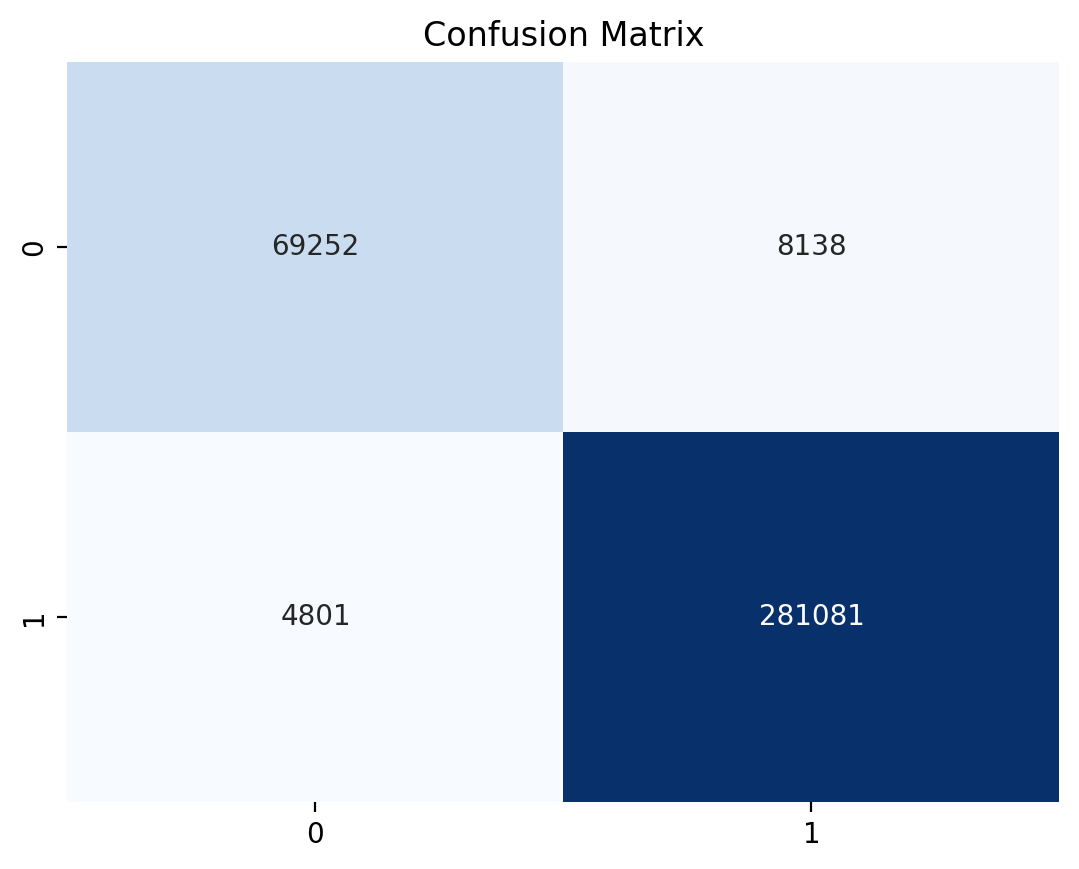

LogisticRegression(random_state=420)

In [86]:
logistic_regression_model(logreg, X_test, y_test)

In [55]:
data['classes'].value_counts(normalize=True)

classes
1    0.786963
0    0.213037
Name: proportion, dtype: float64

## Modeling 2: Random Forest

In [80]:
rf = RandomForestClassifier(max_depth= 5, max_features= 5, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5)

In [57]:
cv_score(rf)

Mean CV Score for Training: 0.9421766933915144
Mean CV Score for Testing: 0.9433262072190464


In [58]:
print(f'Random Forest train score: {rf.score(X_train, y_train)}')
print(f'Random Forest test score: {rf.score(X_test, y_test)}')

Random Forest train score: 0.9461182538690048
Random Forest test score: 0.9459743663150477


In [81]:
metrics(rf)

Accuracy score: 97.04%
Recall score: 98.38%
Precision score: 97.86%
Specificity score: 92.07%
F1 score: 98.12%


,Predicted Failure,Predicted Success
Actual Failure,71253,6137
Actual Success,4632,281250


In [ ]:
random_forest_model(rf, X_test, y_test)

In [60]:
feature_importance = pd.Series(data = rf.feature_importances_,
                              index = X.columns)
feature_importance.sort_values(ascending = False)

recoveries                                  0.156517
collection_recovery_fee                     0.148892
last_fico_range_high                        0.145370
last_fico_range_high*last_fico_range_low    0.127395
recoveries*collection_recovery_fee          0.122221
                                              ...   
num_tl_30dpd                                0.000000
delinq_amnt                                 0.000000
collections_12_mths_ex_med                  0.000000
chargeoff_within_12_mths                    0.000000
acc_now_delinq                              0.000000
Length: 79, dtype: float64

### Modeling 3: XGBoost

In [39]:
xgb = XGBClassifier()

In [40]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
cv_score(xgb)

NameError: name 'cv_score' is not defined

In [42]:
print(f'XGBoost train score: {xgb.score(X_train, y_train)}')
print(f'XGBoost test score: {xgb.score(X_test, y_test)}')

XGBoost train score: 0.9811156702067165
XGBoost test score: 0.9790432513378405


In [43]:
metrics(xgb)

Accuracy score: 97.90%
Recall score: 98.91%
Precision score: 98.44%
Specificity score: 94.2%
F1 score: 98.67%


,Predicted Failure,Predicted Success
Actual Failure,72899,4491
Actual Success,3122,282760


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     77390
           1       0.98      0.99      0.99    285882

    accuracy                           0.98    363272
   macro avg       0.97      0.97      0.97    363272
weighted avg       0.98      0.98      0.98    363272



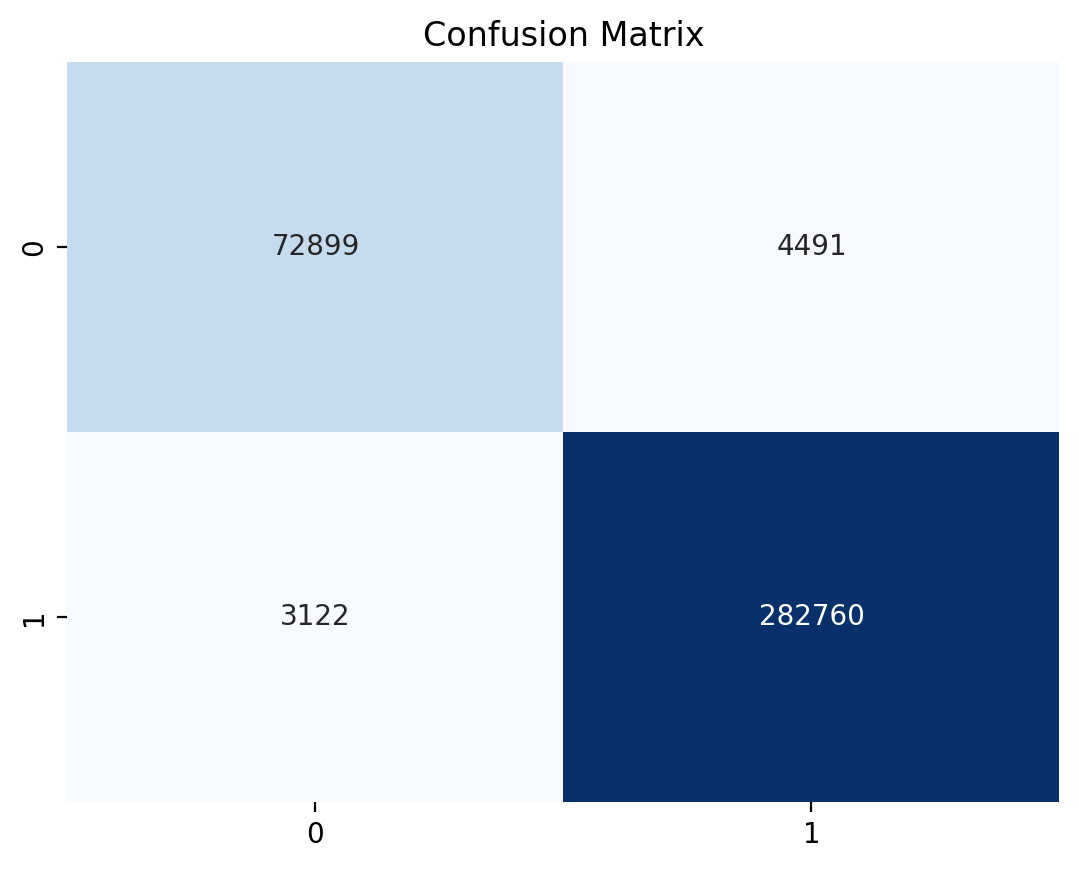

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
xgboost_model(xgb, X_test, y_test)

In [46]:
# save the model to disk pkl
import pickle
filename = './model/credit_risk_xgb.pkl'
pickle.dump(xgb, open(filename, 'wb'))